# PyTorch: final loss vs noise (stdev) of data

Constants:
- Epochs = 100
- Linear function: $y=-0.77x-3.26+noise(\sigma)$, i.e. $m=-0.77$ and $b=-3.26$
- 10 observations in sample
- $x_{max} - x_{min} = 20$
- $0<=\sigma<=5$

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def regression(my_x, my_m, my_b):
  return my_m * my_x + my_b

In [3]:
def mse(my_y_hat, my_y):
  mse_cost = (1/(len(my_y))) * torch.sum((my_y_hat - my_y)**2)
  return mse_cost

In [4]:
stdev_df = pd.DataFrame(data={"Epochs":np.arange(0,100,1)})
stdev_df.set_index("Epochs", inplace=True)

In [5]:
for i in range(0,5,1):
  x = torch.linspace(-10., 10., steps=10)
  y = -0.77*x -3.26 + torch.normal(mean=torch.zeros(10), std=i)

  m = torch.tensor([0.7]).requires_grad_()
  b = torch.tensor([0.9]).requires_grad_()
  optimizer = torch.optim.SGD([m, b], lr=0.01)
  #regression_plot(x, y, m, b)

  epochs = 100 # train over entire dataset 100 times
  loss_series = []
  for epoch in range(epochs):

    optimizer.zero_grad() # reset gradients to zero, else they accumulate
    # Step 1: calculate y_hat using our regression model
    y_hat = regression(x, m, b)
    # Step 2: calculate cost using y_hat and y
    C = mse(y_hat, y) 
    # Step 3: use autodiff to calculate slope of cost w.r.t. parameters m & b
    C.backward() 
    # Step 4: adjust model parameters m & b by small step (lr=0.01) in direction told by slopes from step 3
    optimizer.step() 
    loss_series.append(C.item())
    """
    print("Epoch {}, Cost {}, m grad {}, b grad {}".format(
        epoch,
        "%.3g" % C.item(),
        "%.3g" % m.grad.item(),
        "%.3g" % b.grad.item()
    ))
    """
  #regression_plot(x, y, m, b)
  stdev_df["Sigma={}".format(i)] = np.array(loss_series)

## Plot cost against standard deviation

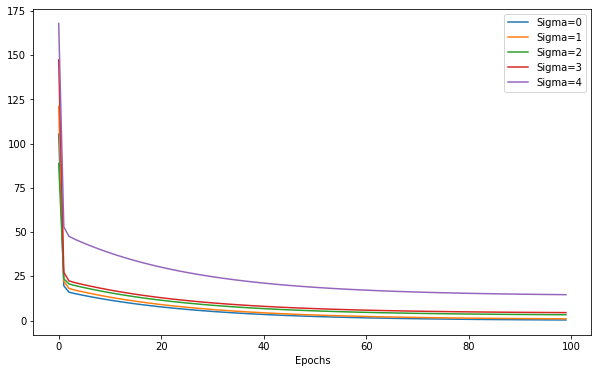

In [6]:
stdev_df.plot(figsize=(10,6))
plt.show()